### Prediction of risk of Coronary Heart Disease (CHD) using Binary classification implemented with LOGISTIC REGRESSION

[1] Import libraries

In [28]:
import math
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

[2] Import dataset

In [29]:
dataset = pd.read_csv("framingham.csv")
dataset.head(20) 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [30]:
age_max = dataset['age'].max()
age_min = dataset['age'].min()

education_max = dataset['education'].max()
education_min = dataset['education'].min()

cigsPerDay_max = dataset['cigsPerDay'].max()
cigsPerDay_min = dataset['cigsPerDay'].min()

totChol_max = dataset['totChol'].max()
totChol_min = dataset['totChol'].min()	

sysBP_max = dataset['sysBP'].max()
sysBP_min = dataset['sysBP'].min()

diaBP_max = dataset['diaBP'].max()
diaBP_min = dataset['diaBP'].min()	

BMi_max = dataset['BMI'].max()
BMi_min = dataset['BMI'].min()

heartRate_max = dataset['heartRate'].max()
heartRate_min = dataset['heartRate'].min()	

glucose_max = dataset['glucose'].max()
glucose_min = dataset['glucose'].min()

[3] Check for NULL values

In [31]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Heatmap of NULL values

<Axes: >

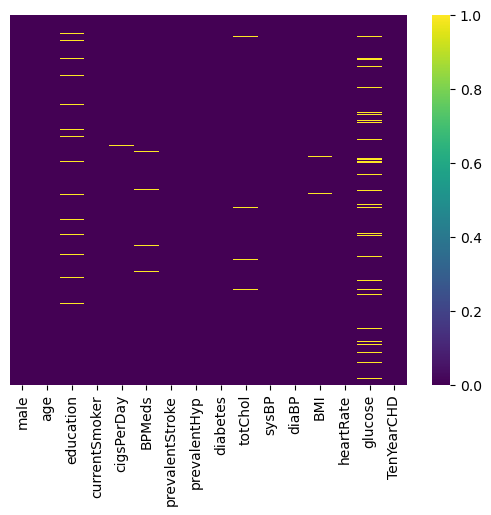

In [32]:
sns.heatmap(dataset.isnull(), yticklabels = False, cmap = "viridis")

[4] Remove NULL values and Duplicates

In [33]:
dataset.dropna(inplace = True)
dataset.drop_duplicates(inplace = True)

dataset.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

[5] Normalization Function

In [34]:
def Normalize_(column):
    min_val = column.min()
    max_val = column.max()
    return (column - min_val) / (max_val - min_val)

In [35]:
for col in dataset.columns:
    dataset[col] = Normalize_(dataset[col])

[6] Separate FEATURES and TARGET

In [36]:
x = dataset.drop(columns = 'TenYearCHD', axis = 1)
y = dataset['TenYearCHD']

x = x.to_numpy()
y = y.to_numpy()

[7] Splitting dataset into TRAINING and TESTING datasets

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

print("Training dataset = ", (x_train.shape[1]/x.shape[1])*100, "%")
print("Testing dataset = ", (x_test.shape[1]/x.shape[1])*100, "%")

Training dataset =  100.0 %
Testing dataset =  100.0 %


In [38]:
x_train = x_train.T
x_test = x_test.T


print(f"{x_train.shape}")
print(f"{x_test.shape}")

(15, 2926)
(15, 732)


[8] Developing the LOGISTIC REGRESSION model 

In [39]:
def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return z

In [40]:
iterations = 500
learning_rate = 0.01

cost_list = []
m = x_train.shape[1]
num_features = x_train.shape[0]

# Initialize weights and bias
W = np.zeros((num_features, 1))
B = 0

Z = np.dot(x_train.T, W) + B 
A = sigmoid(Z)

for i in range(iterations):
    
    Z = np.dot(W.T, x_train) + B
    A = sigmoid(Z)

    for j in range(len(y_train)):
        cost = (-1/m) * np.sum( y_train * np.log(A) + (1 - y_train) * np.log(1 - A) )

    cost_list.append(cost)

    dW = (1/m) * np.dot(A - y_train, x_train.T)
    dB = (1/m) * np.sum(A - y_train)


    W = W - learning_rate * (dW.T)
    B = B - learning_rate * dB

print(f"Weights: {W}")
print(f"Bias: {B}")



Weights: [[-0.20124799]
 [-0.21868685]
 [-0.25990684]
 [-0.27313463]
 [-0.06047429]
 [ 0.00730028]
 [ 0.00376283]
 [-0.05006432]
 [ 0.00770232]
 [-0.15806896]
 [-0.1127565 ]
 [-0.21257567]
 [-0.15400179]
 [-0.21422972]
 [-0.0667558 ]]
Bias: -0.6935532773505377


[9] Plot Errors VS Iterations

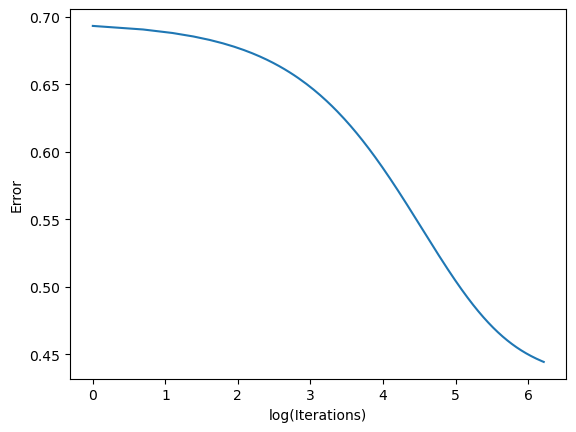

In [41]:
rng = np.arange(1, len(cost_list) + 1)
rng = np.log(rng)
cost_list = np.array(cost_list)
cost_list = np.abs(cost_list)

plt.plot(rng, cost_list)
plt.xlabel("log(Iterations)")
plt.ylabel("Error")
plt.show()

[10] Testing model on Testing dataset <br>

ACCURACY OF MODEL <br>
(The no. of iterations has been optimized to achieve the maximum accuracy possible)

In [42]:
Z = np.dot(W.T, x_test) + B
A = sigmoid(Z)

A = (A > 0.5)
A = np.array(A, dtype = 'int64')
acc = (1 - np.sum(np.absolute(A - y_test))/y_test.shape[0]) * 100

print(f"Accuracy = {acc:0.2f} %")

Accuracy = 83.47 %


## [11] Prediction based on User input

Take input from user

In [43]:
# NORMALIZARION FUNCTION
def normalize_(parameter, max, min):
    parameter_normalized = ((parameter - min)/(max - min))
    return parameter_normalized

In [47]:
sex_norm = int(input("Enter sex: 0 for Female . . . 1 for Male: "))

age = int(input("Enter age: "))	
age_norm = normalize_(age, age_max, age_min)

education = float(input("Enter education level (1.0 - 4.0): "))
education_norm = normalize_(education, education_max, education_min)

currentSmoker = int(input("Patient smoker status (0 for No, 1 for Yes): "))

cigsPerDay = int(input("No. of cigs smoked per day:  "))	
cigsPerDay_norm = normalize_(cigsPerDay, cigsPerDay_max, cigsPerDay_min)

BPMeds = int(input("Is the patient on Blood pressure medication?? (0 for No, 1 for Yes): "))	

prevalentStroke = int(input("Does the patient have history of stroke?? (0 for No, 1 for Yes): "))

prevalentHyp = int(input("Does the patient have history of Hypertension?? (0 for No, 1 for Yes): "))

diabetes = int(input("Does the patient have history of Diabetes?? (0 for No, 1 for Yes): "))	

totChol =	int(input("Cholestrol level of patient: "))
totChol_norm = normalize_(totChol, totChol_max, totChol_min)

sysBP = int(input("Systolic BP: "))	
sysBP_norm = normalize_(sysBP, sysBP_max, sysBP_min)

diaBP = int(input("Diastolic BP: "))	
diaBP_norm = normalize_(diaBP, diaBP_max, diaBP_min)

BMi = float(input("BMI of patient: "))	
BMi_norm = normalize_(BMi, BMi_max, BMi_min)

heartRate = float(input("Heart rate: "))	
heartRate_norm = normalize_(heartRate, heartRate_max, heartRate_min)

glucose = float(input("Glucose level of patient (mg/dL): "))
glucose_norm = normalize_(glucose, glucose_max, glucose_min)

parameters = np.array([sex_norm, age_norm, education_norm, currentSmoker, cigsPerDay_norm, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol_norm, sysBP_norm, diaBP_norm, BMi_norm, heartRate_norm, glucose_norm])
y_prediction = sigmoid(np.dot(parameters, W) + B) 

result = 1 if y_prediction > 0.5 else 0

if(result == 1):
    print("Risk of having heart disease - Yes")
else:
    print("Risk of having heart disease - No")

Risk of having heart disease - No
